In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("SampleSuperstore.csv")

In [3]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df["Category"].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [5]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

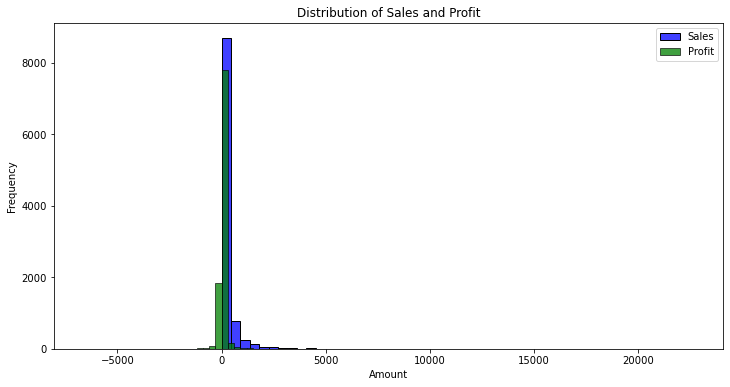

In [7]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Sales'], bins=50, color='blue', label='Sales')
sns.histplot(df['Profit'], bins=50, color='green', label='Profit')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Sales and Profit')
plt.show()

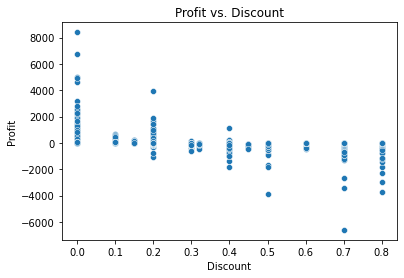

In [9]:
sns.scatterplot(x='Discount', y='Profit', data=df)
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.title('Profit vs. Discount')
plt.show()

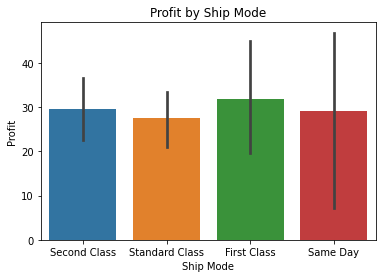

In [10]:
sns.barplot(x='Ship Mode', y='Profit', data=df)
plt.xlabel('Ship Mode')
plt.ylabel('Profit')
plt.title('Profit by Ship Mode')
plt.show()

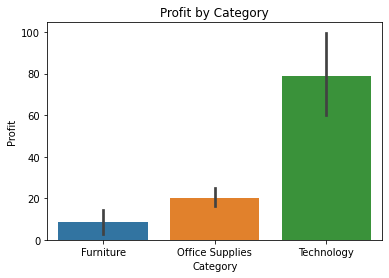

In [11]:
sns.barplot(x='Category', y='Profit', data=df)
plt.xlabel('Category')
plt.ylabel('Profit')
plt.title('Profit by Category')
plt.show()

#### Lowest Profit Areas

In [12]:
# Calculate average profit ratios
average_profit_ratio_by_category = df.groupby('Category')['Profit'].mean()
average_profit_ratio_by_subcategory = df.groupby('Sub-Category')['Profit'].mean()
average_profit_ratio_by_region = df.groupby('Region')['Profit'].mean()

# Find the categories, sub-categories, and regions with the lowest average profit ratios
lowest_avg_profit_ratio_category = average_profit_ratio_by_category.idxmin()
lowest_avg_profit_ratio_subcategory = average_profit_ratio_by_subcategory.idxmin()
lowest_avg_profit_ratio_region = average_profit_ratio_by_region.idxmin()

# Print the results
print("Category with Lowest Average Profit Ratio:", lowest_avg_profit_ratio_category)
print("Sub-Category with Lowest Average Profit Ratio:", lowest_avg_profit_ratio_subcategory)
print("Region with Lowest Average Profit Ratio:", lowest_avg_profit_ratio_region)

Category with Lowest Average Profit Ratio: Furniture
Sub-Category with Lowest Average Profit Ratio: Tables
Region with Lowest Average Profit Ratio: Central


In [13]:
# Calculate average profit ratios by Region
average_profit_ratio_by_region = df.groupby('Region')['Profit'].mean()
lowest_avg_profit_ratio_region = average_profit_ratio_by_region.idxmin()
print("Region with Lowest Average Profit Ratio:", lowest_avg_profit_ratio_region)

Region with Lowest Average Profit Ratio: Central


In [14]:
# Calculate average profit ratios by City and State
average_profit_ratio_by_city_state = df.groupby(['City', 'State'])['Profit'].mean()
weakest_city_state = average_profit_ratio_by_city_state.idxmin()
print("City and State with Lowest Average Profit:", weakest_city_state)

City and State with Lowest Average Profit: ('Burlington', 'North Carolina')


In [15]:
# Calculate total Profit by Category and Sub-Category
total_profit_by_category_subcategory = df.groupby(['Category', 'Sub-Category'])['Profit'].sum()
weakest_category_subcategory = total_profit_by_category_subcategory.idxmin()
print("Category and Sub-Category with Lowest Total Profit:", weakest_category_subcategory)

Category and Sub-Category with Lowest Total Profit: ('Furniture', 'Tables')
